# Logistic Regression


## Table of Contents:
1. [Background reading](#background-reading)
2. [Dataset](#dataset)
3. [Essence of Data](#essence-of-data)
    
    3.1 [Examples of application](#examples-of-application)
    
    3.2 [Example Codes](#example-codes)
        
        
4. [AI in the fabric of society](#ai-in-the-fabric-of-society)


## Background reading:

**Suggested Reading**:

*Intro to Statistical Learning*: 4.3 Logistic Regression, 4.3.4 Multiple Logistic Regression

*Ethical Algorithm*: Chapter 3, Games People Play, The Dating Game, (Page 94-97)

**Optional Reading**:

*Intro to Statistical Learning*: 4.3.5 Multinomial Logistic Regression, 4.4.2 Linear Discriminant Analysis (explains specification, specificity, and ROC curve)

## Dataset:
The example on github uses the social network advertising clicks database from kaggle
Link: https://www.kaggle.com/jahnveenarang/cvdcvd-vd?select=Social_Network_Ads.csv 

Attribute columns:
1. User ID
2. Gender - male or female
3. Age
4. Estimated Salary
5. Gender Binary (Male = 1 and Female = 0)
6. Purchased (User clicked on the ad and purchased = 1, user did not click on the ad = 0)

The class being used for our target prediction class is “Purchased” 


## Essence of Data:

**What is logistic regression?**
Logistic regression is a supervised machine learning algorithm that is used for classification.

There are two types of logistic regression
Binary logistic regression (ie. patient has diabetes or patient does not have diabetes)
Multi-linear functions (ie. freshman, sophomore, junior, senior)

**How does logistic regression work?**
Article: https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

The predicted Y value lies within the range of 0 and 1.
If we have two possible class values then we must set a threshold value, where all values above this threshold are assigned to one class and all values below the threshold to the other class. Typically we would choose a value of 0.5. Any unique user ID with a probability below 0.5 will be assigned to whichever class is 0 and any unique user ID with a probability above 0.5 will be assigned a class value of 1.

The equation that logistic regression classifier uses when there are multiple predictors and a set of binary classifications. The sigmoid function is used to map predictions from probabilities.

Graph here shows the shape of **sigmoid function**
*The function of sigmoid: $S(x) = \frac{1}{1+e^{-x}}$*

![](../../../fig/Logistic/fig1.png)

<div align = 'center'><font size = '10'>$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}$</font></div>

<div align = 'center'><font size = '10'>$\log\frac{p(X)}{1-p(X)}=\beta_0+\beta_1X$</font></div>

<div align = 'center'><font size = '10'>$\hat{p}(X)=\frac{e^{\hat{\beta}_0+\hat{\beta}_1X}}{1+e^{\hat{\beta}_0+\hat{\beta}_1X}}$</font></div>

<div align = 'center'><font size = '10'>$\log\frac{p(X)}{1-p(X)}=\beta_0+\beta_1X_1+...+\beta_pX_p$</font></div>

<div align = 'center'><font size = '10'>$p(X) = \frac{e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}{1+e^{\beta_0+\beta_1X_1+...+\beta_pX_p}}$</font></div>




### Examples of application?
**Article:** 

https://www.forbes.com/sites/forbesbusinesscouncil/2022/01/18/how-machine-learning-is-shaping-the-future-of-advertising/?sh=7bf8d1f51361 

**Article about possible targeted ads being used to discriminate against disabled people and minorities in housing and political candidates using “dark ads” to target groups:**

https://www.ama.org/marketing-news/the-ethics-of-targeting-minorities-with-dark-ads/
https://hbr.org/2019/11/how-targeted-ads-and-dynamic-pricing-can-perpetuate-bias 

Logistic regression can be used to predict disease survival prediction, natural language processing tasks, sentiment analysis, and fraudulent transactions. It is commonly for targeted advertising by e-commerce retailers, political marketing campaigns, banks/credit card companies, and advertising companies.
Possible ethical issues include targeting by exclusion and “dark ads”
What groups (age, gender, income, education level) should these companies show advertisements towards in order to increase sales and support?

This ties back to exploration vs. exploitation. When it comes to advertising a company does not want to spend money on ads for groups who are not already designated as good “target groups” (typically done through market research). They will want to exploit what they already know about groups who are likely to become customers and target their advertisements towards these groups in order to drive sales.


### Example Codes

In [30]:
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [31]:
#Load the dataset and columns of interest
addataset = '../../../data/SocialNetworkAdClicks.csv'
df_addataset = pd.read_csv(addataset, usecols = ['User ID','Age','EstimatedSalary','GenderBinary','Purchased'])
#df_addataset = pd.read_csv(addataset, usecols = ['Age','EstimatedSalary','GenderBinary','Purchased'])

In [32]:
#checking dataset for null values
df_addataset.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
GenderBinary       0
dtype: int64

In [33]:
#dataset descriptive statistics
df_addataset.describe()

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <BarContainer object of 10 artists>)

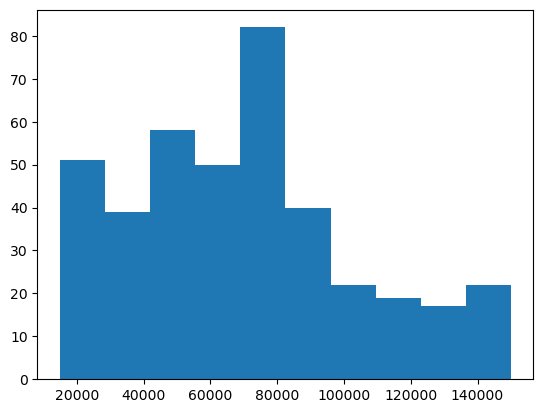

In [34]:
plt.hist(df_addataset['EstimatedSalary'])

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

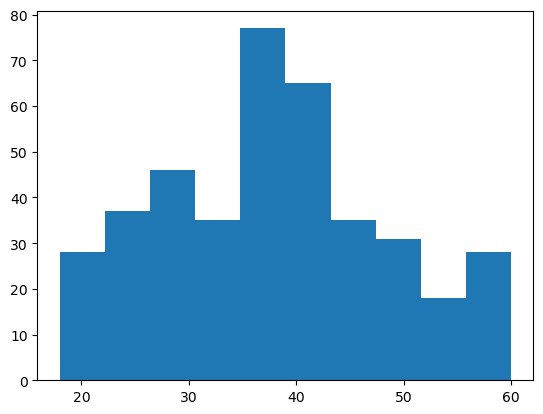

In [35]:
plt.hist(df_addataset['Age'])

In [36]:
#show the head of the dataset
df_addataset.head()

,User ID,Age,EstimatedSalary,Purchased,GenderBinary
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [37]:
#identify which columns are our predictors and which is our target 
#feature_cols= ['User ID', 'GenderBinary','Age','EstimatedSalary']
feature_cols= ['GenderBinary','Age']
#feature_cols= [ 'GenderBinary','Age','EstimatedSalary']
#Here we excluded the Estimaed Salary from our features
predictors = df_addataset[feature_cols]
target = df_addataset.Purchased

In [38]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.2)

In [39]:
#initiate logistic regression model
logreg = LogisticRegression()
#fit the model to the training data
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [40]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy))

Accuracy of the Logistic Regression Model: 85.0%


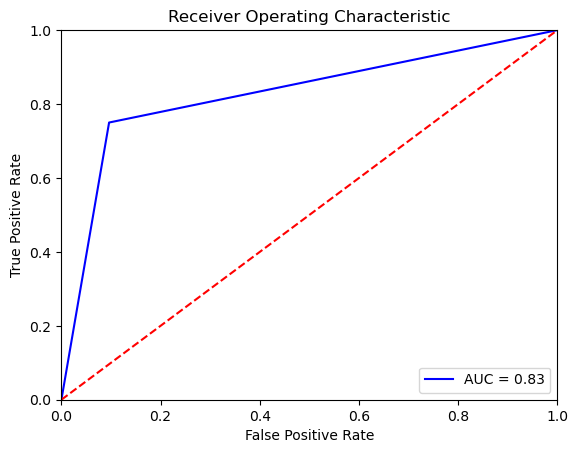

In [41]:
#create ROC Curve
# If you are confused with ROC Curve, go below to see the concept
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

In [42]:
#true positive rate numbers (you can print the FPR also)
tpr

array([0.  , 0.75, 1.  ])

In [43]:
# ROC Area Under the Curve
roc = metrics.roc_auc_score(y_test,y_pred)*100
print('Area Under the curve accuracy score is: {0}%'.format(roc))

Area Under the curve accuracy score is: 82.6923076923077%


In [44]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[47,  5],
       [ 7, 21]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted Class')

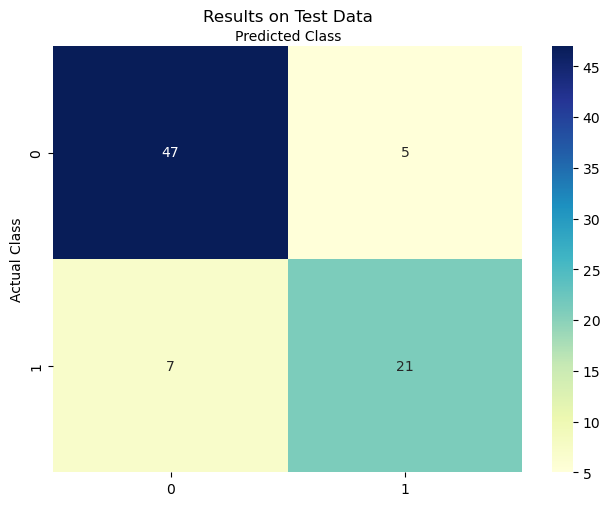

In [45]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')



# Now time to code!

### add iris.csv data provided on repository to your data folder

### Check what we did with Adclick data and model fitting

### Apply what you saw here on Adclick data to iris one



## The only hint you may need is to how to convert string into categorical

## df['variety']= pd.Categorical(df["variety"]).codes










In [46]:
#Load the dataset and columns of interest
addataset = '../../../data/iris.csv'
df_addataset = pd.read_csv(addataset)
df_addataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [47]:
df_addataset.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,2.4,Virginica
141,6.9,3.1,5.1,2.3,Virginica
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [48]:
#here is we convert the target from string (names) into code as 0,1,2 so the classifier can process the modeling
df_addataset['variety']= pd.Categorical(df_addataset["variety"]).codes

In [56]:
#print the change in the variety column
df_addataset.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [57]:
df_addataset.tail(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [49]:
#identify which columns are our predictors and which is our target 
feature_cols= ['sepal.length','sepal.width','petal.length','petal.width']
#feature_cols= ['sepal.length','sepal.width']
predictors = df_addataset[feature_cols]
target = df_addataset.variety

#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.2)

#initiate logistic regression model
logreg = LogisticRegression()
#fit the model to the training data
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,y_pred)*100
print('Accuracy of the Logistic Regression Model: {0}%'.format(accuracy))

Accuracy of the Logistic Regression Model: 96.66666666666667%


### Now to plot ROC curve we have her multiple classes 
### which's not the same case as it were in the previous example, hence, we need to make an encoding special to this called one hot encoding
### we have class 0,1,2 we will make each one of them as an array of size 3 where zero -> [1,0,0], 1 -> [0,1,0] and 2 -> [0,0,1]
more information: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html


In [51]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_pred = label_binarizer.transform(y_pred)

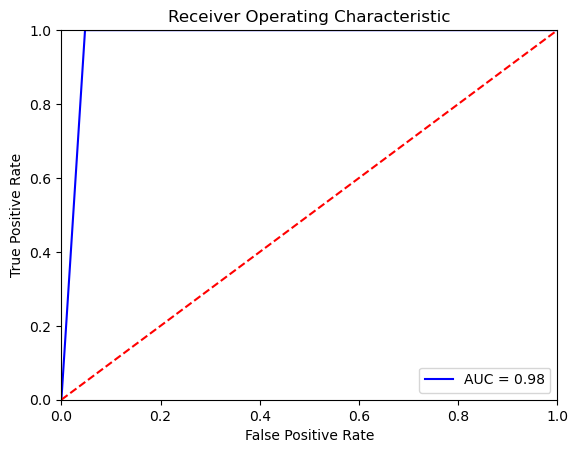

In [52]:
#create ROC Curve
# plotting the ROC for reference of class 1
class_id=1
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_onehot_test[:,class_id], y_onehot_pred[:,class_id])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
#import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

In [55]:
print(tpr,fpr)

[0. 1. 1.] [0.         0.04761905 1.        ]


### Related Concepts- Specificity, Precision, Sensitivity, Accuracy, ROC

![Figure from textbook Page 148](../../../fig/Logistic/fig2.png)

Result: TN = 101, FP = 2, FN = 33, TP = 24

![Figure from textbook Page 149](../../../fig/Logistic/fig3.png)

Calculate:
False Positive Rate = 2/103 = 0.0194 = 1.94% 
True Positive Rate = 24/57 = 0.4211 = 42.11%
Positive Prediction Value = 24/26 = 0.9231 = 92.31%
Negative Prediction Value = 101/134 = 0.7537 = 75.37%

Type I error = 1.94%
Type 2 error = 1-.4211 = 57.89%
Specificity = 100%-1.94% = 98.06% 
Precision = 92.31%
Sensitivity = 42.11%
Our model is specific and precise, but not very sensitive and there is a high probability of type 2 error. Ideally we would want a bigger model with more data points so that the model can have a lot of training data.


**Accuracy**

**ROC (Receiver Operating Characteristic) curve** is a graphical representation of the Type I and Type II errors for all possible thresholds. The performance of the classifier is given by the “area under the curve (AUC)” score. A perfectly accurate classification algorithm will have an AUC score close to 1.


## AI in fabrics of society:

The recommendation system of today's software surprised our users, because it can push you any alluring and intriguing links that attracts its users. The shopping platform such as amazon and walmart will suggest links to some goods that we may interested in, and the video software such as Tiktok will refresh absorbing short videos that addicted us for hours. The improvement of algorithms allow these system to recommend contents that attract people with a higher and higher accuracy.

However, sometimes the recommendation problems will face problems such as oversupply and undersupply. Imagine a good with sepcific quality like attacts a group of people, the recommendation system will send the link to them and most of them will buy. Since the system sends the link simultaneously, the demand will rapidly increase and the good will be undersupplied with high risk, resulting the bad experience to customers. In the book, read the similar problem and think about possibilities that can solve this kind of problems.

Reading: *Ethical Algorithm*: Chapter 3, Games People Play, The Dating Game, (Page 94-97)

In [20]:
#train decision tree
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [21]:
#check accuracy and ROC score of the model
accuracy = metrics.accuracy_score(y_test,predictions)*100
print('Accuracy of the Decision Tree Classification Model: {0}%'.format(accuracy))

Accuracy of the Decision Tree Classification Model: 87.5%


In [22]:
# create a matrix with classification predictions
confusion_matrix = metrics.confusion_matrix(y_test,predictions)
confusion_matrix


array([[88, 13],
       [ 7, 52]], dtype=int64)

By using a decision tree instead of logistic regression for this data set, we can increase the accuracy to 87.5%!

Text(0.5, 257.44, 'Predicted Class')

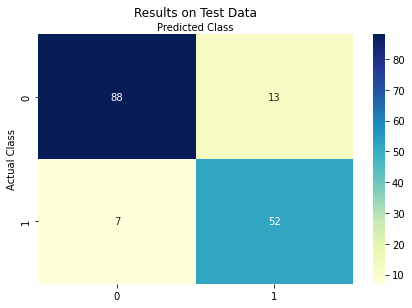

In [23]:
#heat map of accuracy
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'YlGnBu', fmt='g')
ax.xaxis.set_label_position ('top')
plt.tight_layout()
plt.title('Results on Test Data')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')